## Wine Quality dataset balanced

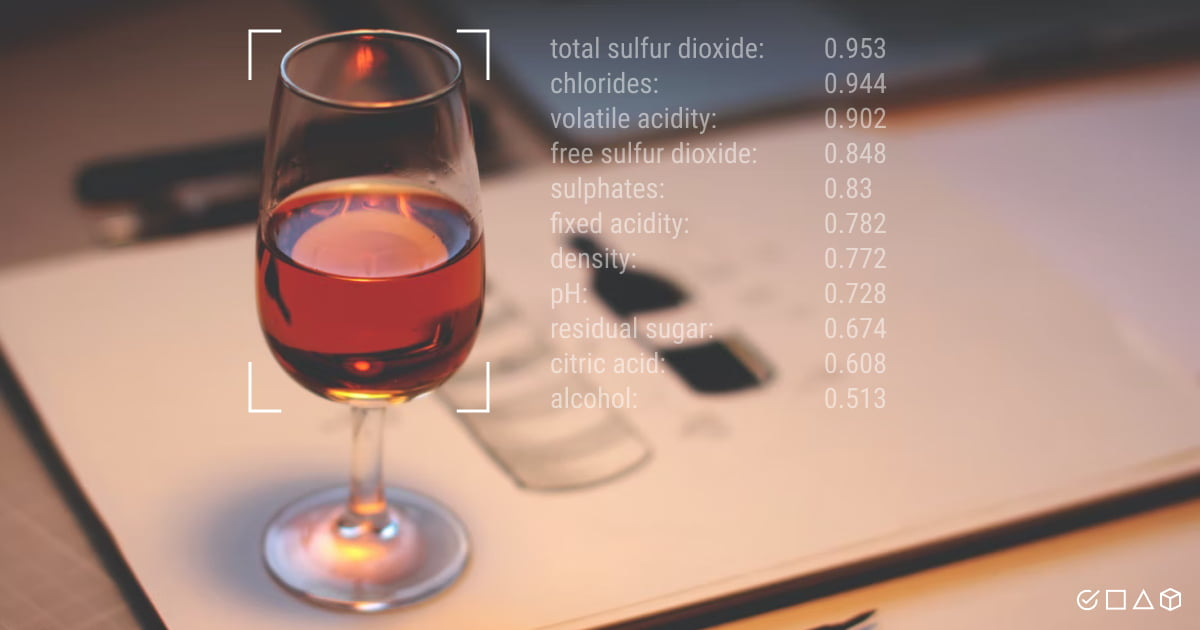

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from itertools import cycle

In [2]:
data = pd.read_csv('./WineQT.csv')
data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
554,9.5,0.570,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4,5,772
722,7.9,0.310,0.32,1.9,0.066,14.0,36.0,0.99364,3.41,0.56,12.6,6,1026
26,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6,36
116,7.8,0.630,0.48,1.7,0.100,14.0,96.0,0.99610,3.19,0.62,9.5,5,165
259,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7,364
120,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1,4,170
55,6.2,0.450,0.20,1.6,0.069,3.0,15.0,0.99580,3.41,0.56,9.2,5,80
444,8.7,0.540,0.26,2.5,0.097,7.0,31.0,0.99760,3.27,0.60,9.3,6,628
24,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,5,34
1022,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6,1434


In [3]:
data.drop(columns='Id', inplace=True)

In [4]:
data.shape

(1143, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [7]:
data.isnull().mean()*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [8]:
data.duplicated().mean()*100

10.936132983377078

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
x = data.iloc[:,:-1].values

In [11]:
y = data.iloc[:,-1].values

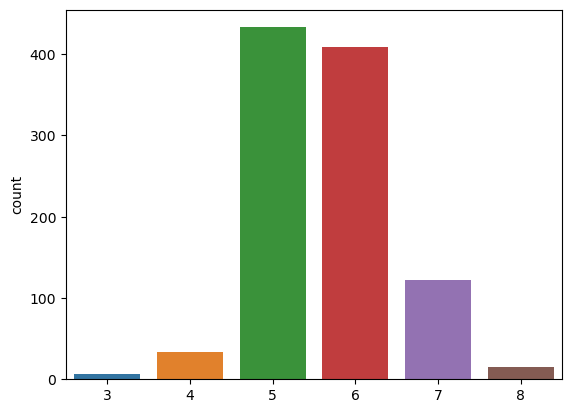

In [12]:
sns.countplot(x=y);

#### We can see that the target data is not balanced. We may use over sampling to balance the data.

#### Initializing the sampler

In [13]:
over_sampler = RandomOverSampler()

In [14]:
x, y = over_sampler.fit_resample(x,y)

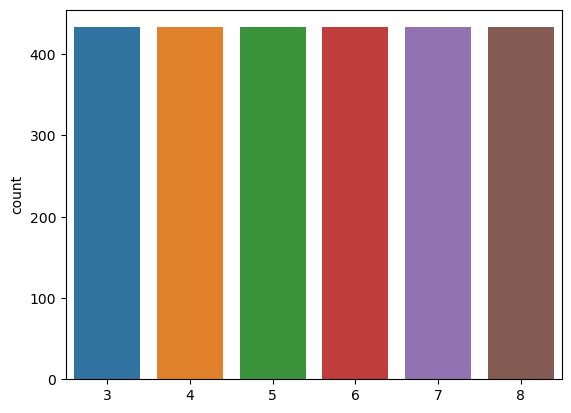

In [15]:
sns.countplot(x=y);

#### we can see that now the data is balanced correctly. 

In [16]:
sc = StandardScaler()

In [17]:
x = sc.fit_transform(x)

### We have to binirize the target :

In [18]:
y = label_binarize(y, classes=[3,4,5,6,7,8])
n_classes = 6

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

### Using Random forest classifier 

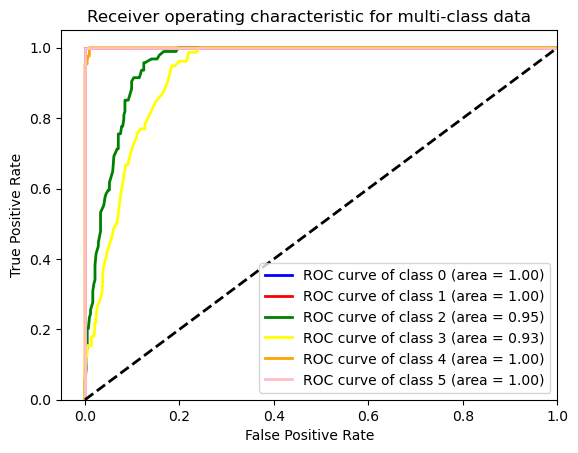

In [20]:
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()